(check-data)=
# Plausible Daten

:::{admonition} **Lernziele**
- Daten kritisch beurteilen
- mit Kennwertbildung und Vergleichen
- um qualitativ hochwertige Daten einzusetzen bei der Energiedatenanalyse
:::

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import shutil

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
numpy 2.1.1
matplotlib 3.9.2
pandas 2.2.3
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if shutil.which('latex'):
    plt.rcParams['text.usetex'] = True

## Plausible Daten - wie beurteilen?

### Anforderungen benötigen plausible Werte

:::{admonition} **AUFGABE**
Wie kommen Sie zu plausiblen Werten in Ihren Anforderungen? Wie können Sie wissen, ob ein Wert typisch oder realistisch ist? Sammeln Sie mind. 5 Wege dazu.
:::

*Antwort:...*

### Beispiel Energiebedarf einer Bäckerei

Auf Nachfrage gibt ein Bäckereibetrieb folgende Verbrauchsdaten an:

In [3]:
EBackJahr = 2000 # jährlicher Stromverbrauch in kWh/a
Mehl = 5000 # jährlicher Mehlverbrauch in kg/a

Kann das sein?

In [4]:
Backtage = 300
EBackTag = EBackJahr/Backtage
print('Durchschnittlicher Stromverbrauch pro Backtag: ' +str(np.round(EBackTag,1)) +' kWh/d')

Durchschnittlicher Stromverbrauch pro Backtag: 6.7 kWh/d


In [5]:
MehlTag = Mehl/Backtage
print('Durchschnittlicher Mehlverbrauch pro Backtag: ' +str(np.round(MehlTag,1))+ ' kg/d')

Durchschnittlicher Mehlverbrauch pro Backtag: 16.7 kg/d


In [6]:
MehlProBrot = np.linspace(0.5,1,2) # ca. 500 - 1000 g Mehl pro Brot, hier in kg
BroteProTag = MehlTag/MehlProBrot
print(str(np.round(BroteProTag[1],1)) + '-' +str(np.round(BroteProTag[0],1)) + ' Brote/Tag')

16.7-33.3 Brote/Tag


Wie viel Leistung hat wohl der Backofen?

In [7]:
PBackZuhause = 3 # Backofen zuhause ca. 3 kW
tBack = 1 # 1 Stunde Backzeit für ein großes Brot
ZahlBroteAusEnergie = EBackTag/(PBackZuhause*tBack)
print('mit der angenommenen Energie werden ' +str(np.round(ZahlBroteAusEnergie,1))+ ' Brote pro Tag gebacken')

mit der angenommenen Energie werden 2.2 Brote pro Tag gebacken


Unplausibel:
- Energie- und Mehlverbrauch passen nicht zusammen
- Anzahl Brote erscheint auch eher niedrig

:::{tip}
**Plausibilisierung auch möglich mit Referenzdaten**: 
- [KurzEnergieCheck der Energieagentur NRW](https://unternehmen.energieagentur.nrw/KurzEnergieCheck/)
- [StromCheck der LEA Hessen](https://ratgeber.co2online.de/stromcheckbmu/lea_hessen/start)
:::

:::{admonition} **VORSICHT**
Auch Referenzdaten können unplausibel sein (perfekt gibt es nicht).
:::

### Beispiel Messdaten einer Waschmaschine

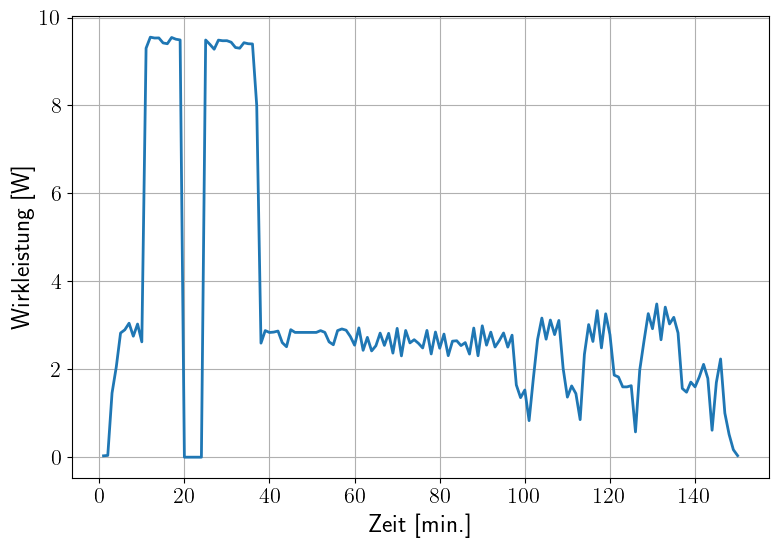

In [9]:
PWaschgang = pd.read_csv('../data/wama.csv',header=1)
PWaschgang = PWaschgang.set_index('%Aufnahmezeit [min.]')
ax = PWaschgang['Stromstärke [A]'].plot(figsize=(9,6))
ax.set_ylabel('Wirkleistung [W]')
ax.set_xlabel('Zeit [min.]')
plt.grid()
plt.show()

:::{admonition} **AUFGABE**
Sehen Sie sich die Daten an. Kann das sein? Sie können drei Fehler im Datensatz finden.
:::

*Antwort:...*

## Techniken zur Plausibilisierung von Daten

- Mit **Referenzwerten** aus der Fachliteratur vergleichen - wobei Vorsicht geboten ist, denn nicht alle Referenzsysteme sind wirklich vergleichbar und auch nicht alle Referenzwerte sind plausibel.

- **Nullmessungen** sind häufig fehlerhafte Messungen (fehlende Messpunkte) und müssen bereinigt werden.

- **Viele konstant bleibende Messwerte** (bei denen nicht mal die letzte Nachkommastelle schwankt) deuten darauf hin, dass das Messgerät fehlerhafterweise immer wieder den ersten Wert gespeichert hat, obwohl bereits ein anderer Messwert anlag.

- **Energiesummen bilden** - bei einem Leistungsprofil muss die Energiesumme dem gesamten Energieverbrauch entsprechen - mit einer gewissen Toleranz für die aufsummierten Messungenauigkeiten.

- **Rangfolge der Vertrauenswürdigkeit** von Fachliteratur beachten.

- **Selber nachmessen** (wenn das immer so einfach wäre).

- **Verschiedene Quellen** nutzen - wenn sich z. B. in mehreren Fachbüchern, die einander nicht zitieren, unabhängig voneinander also, derselbe Wert findet, dann ist der vertrauenswürdiger.

- **Statistische Datenerhebungen** nutzen, um zu beurteilen, ob ein Wert noch "im Rahmen" ist oder ob er sehr untypisch ist.

## Varianz von Daten

### Reproduzierbarkeit und Schwankungen bei mehrfachen Messungen

Beispiele: 
- Wie stark variiert die jährliche Solarstrahlung in DE?
- Wie stark variiert der jährliche Stromverbrauch einer vierköpfigen Familie?
- Was, wenn noch ein Kind geboren wird?
- Was, wenn eins auszieht? (Oder wegen Corona wieder zuhause einzieht?)
- Wie stark variiert der Energiebedarf einer Waschmaschine bei unterschiedlichen Beladungen (im gleichen Programm)?
- Was, wenn das Wasser besonders kalt aus der Leitung kommt?

:::{admonition} **AUFGABE**
Einige Einflussgrößen auf Energienutzung lassen sich nicht konstant halten, jedenfalls nicht über mehrere Jahre. Diese Einflussgrößen stellen sozusagen Störgrößen für die energetische Optimierung dar: Was heißt das für Ihre Optimierungsbemühungen?
:::

*Antwort:...*

### Umgang mit variierenden Randbedingungen

Fiktive Daten einer Energieberatung: welche energetische Optimierung lohnt?

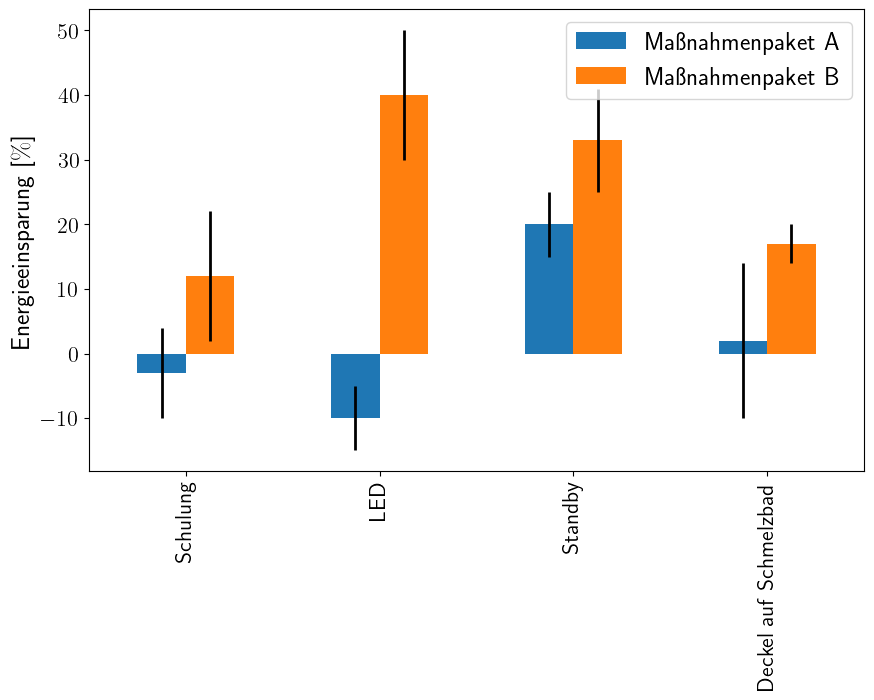

In [37]:
data_eneff = {'Maßnahmenpaket A': [-3, -10, 20,2], 'Maßnahmenpaket B': [12, 40, 33,17]}
df = pd.DataFrame(data=data_eneff, index = ['Schulung', 'LED', 'Standby', 'Deckel auf Schmelzbad'])
df.plot(kind = 'bar', yerr = [[7,5,5,12],[10,10,8,3],[8,3,7,20],[25,30,28,35]], ylabel=r'Energieeinsparung [$\%$]')
plt.show()

:::{admonition} **AUFGABE**
Sammeln Sie in Ihrem Projekt Einflussgrößen, die variabel sein könnten. Überlegen Sie auch, wie Sie diese berücksichtigen können.
:::

*Antwort:...*

Es gilt bei der Angabe von Zahlen das Prinzip der [signifikanten Ziffern](https://chem.libretexts.org/Bookshelves/General_Chemistry/Chem1_(Lower)/03%3A_Measuring_Matter/3.03%3A__Significant_Figures_and_Rounding_off). Man kann das in python [automatisiert](https://docs.python.org/3/library/string.html#format-string-syntax) tun.

:::{bibliography}
:filter: docname in docnames
:::